In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [4]:
df = pd.read_csv("EasyVisa.csv")

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Exploring data

In [8]:
# define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("{} numerical features: {}".format(len(numerical_features), numerical_features))
print("{} categorical_features: {}".format(len(categorical_features), categorical_features))

3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
9 categorical_features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [9]:
# proportion of count data in categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)* 100)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

observations:
case_id appears to be a unique identifier
continent column is highly biased towards asia followed by Europe and North America
unit of wage - mostly yearly contracts

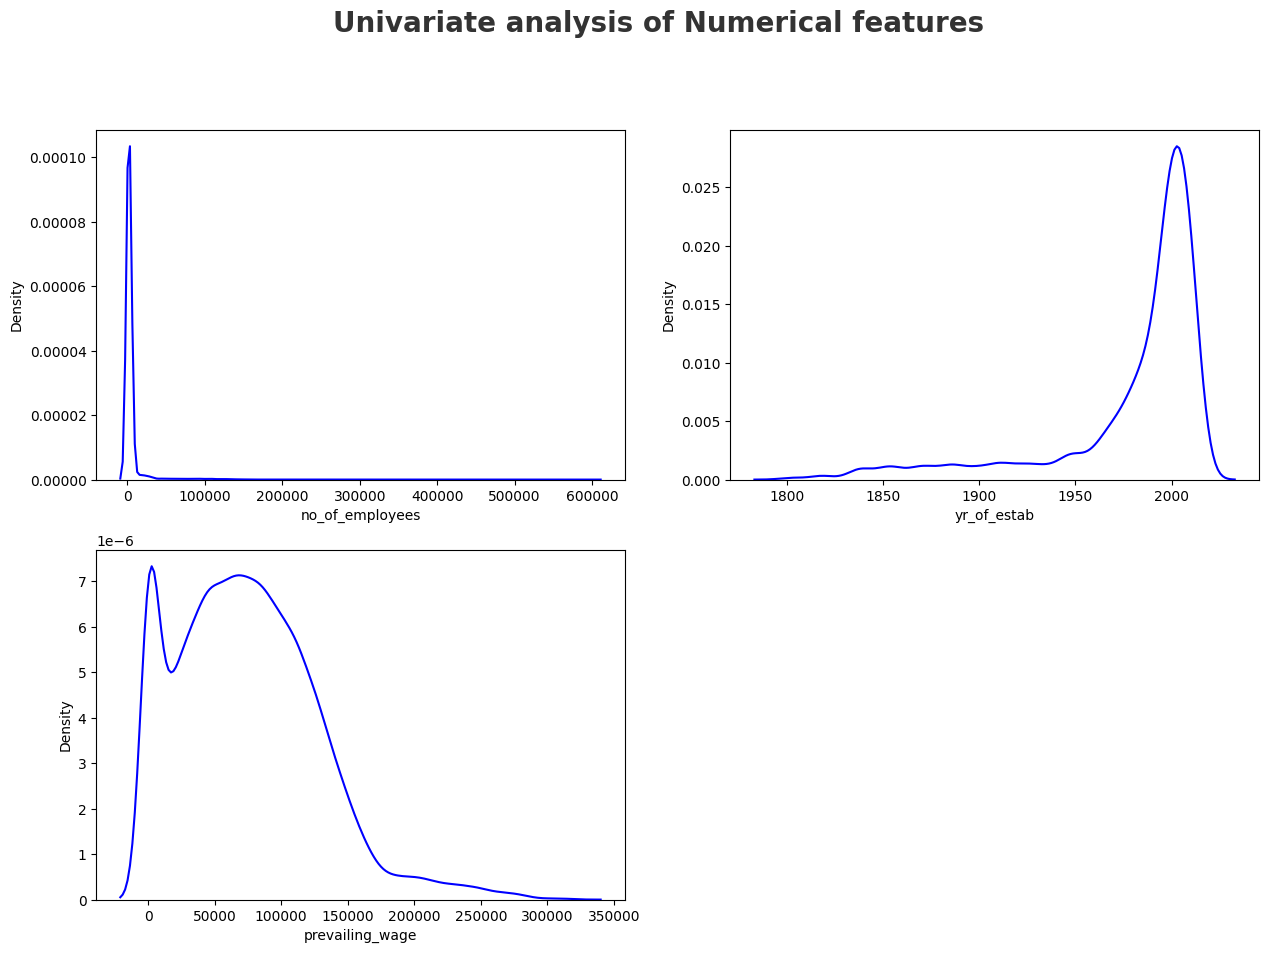

In [10]:
# plotting numerical features
plt.figure(figsize = (15, 10))
plt.suptitle('Univariate analysis of Numerical features', fontsize=20, fontweight='bold', alpha=0.8, y= 1.)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x = df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout

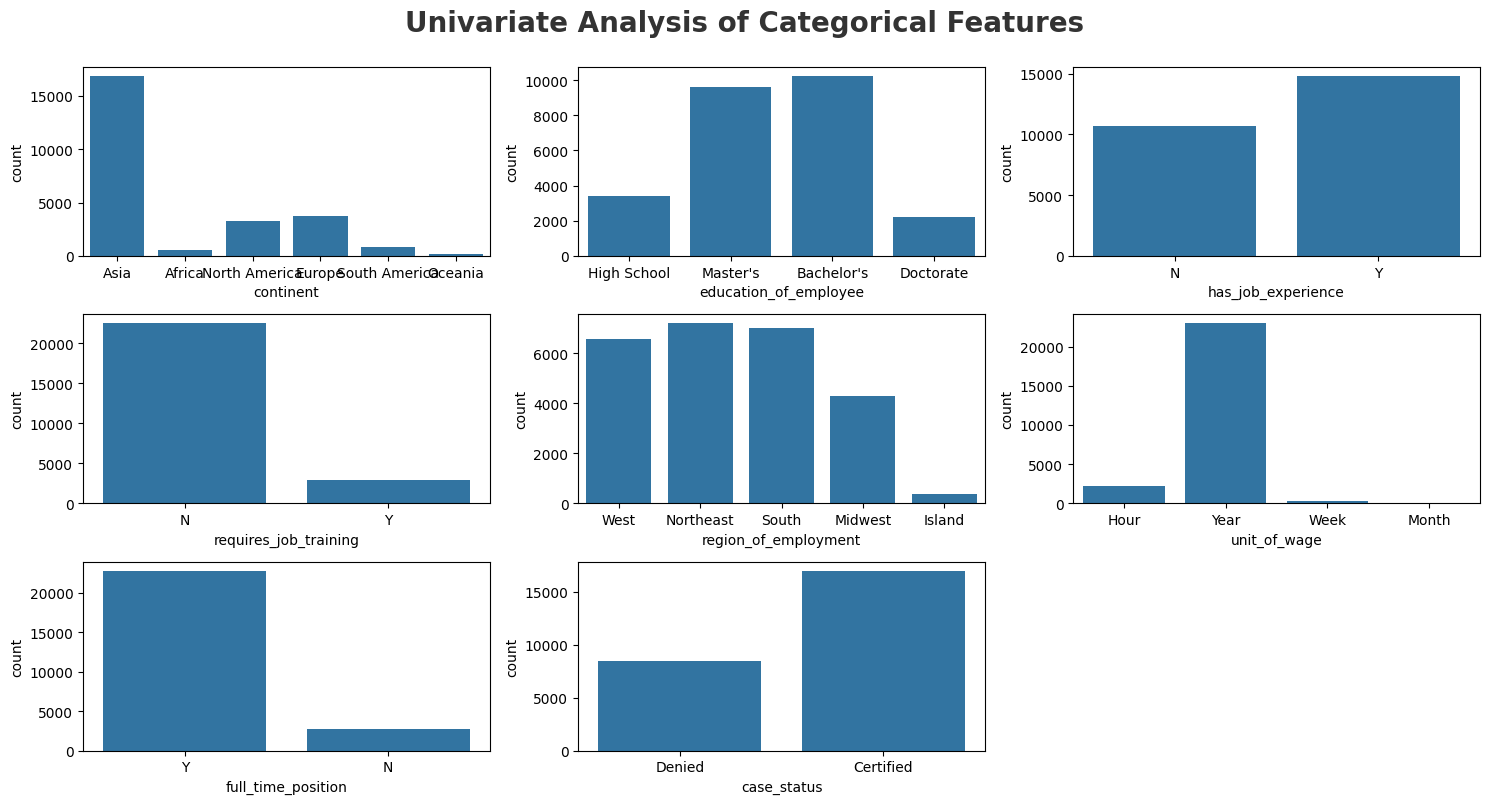

In [11]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

Multivariate analysis

In [12]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <=25]
continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

print("{} discrete features {}".format(len(discrete_features), discrete_features))
print("{} continuous_features {}".format(len(continuous_features), continuous_features))

0 discrete features []
3 continuous_features ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [18]:
# check multicolinearity for categorical features using chi-squared test

from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject null hypotheses')
    else:
        chi2_test.append('Fail to reject null hyptheses')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypotheses result']
result

,Column,Hypotheses result
0,continent,Reject null hypotheses
1,education_of_employee,Reject null hypotheses
2,has_job_experience,Reject null hypotheses
3,requires_job_training,Fail to reject null hyptheses
4,region_of_employment,Reject null hypotheses
5,unit_of_wage,Reject null hypotheses
6,full_time_position,Reject null hypotheses
7,case_status,Reject null hypotheses


In [20]:
# checking null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

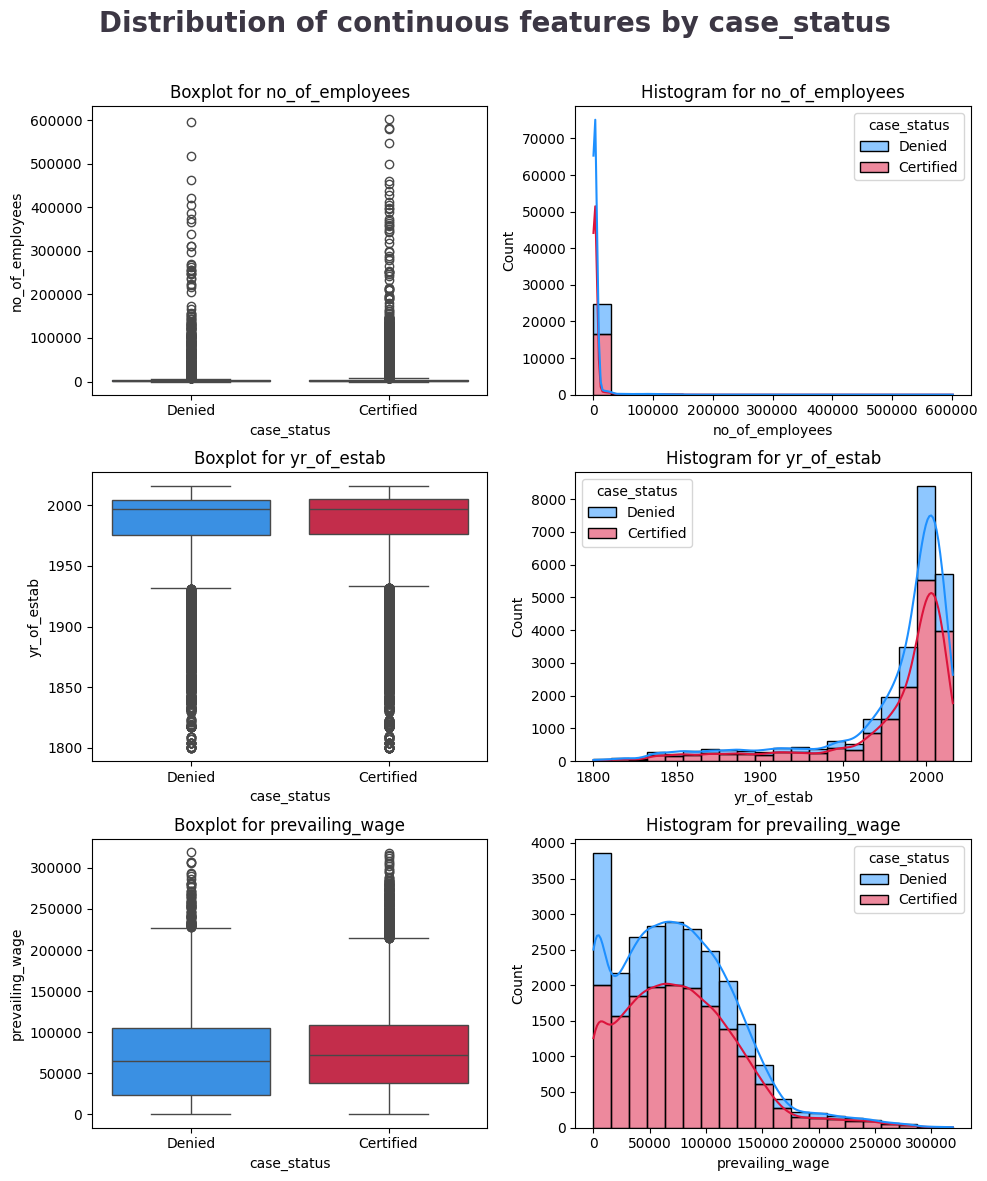

In [23]:
# continuous features analysis

clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of continuous features by case_status', color='#3C3744', fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):
    sns.boxplot(data = df, x='case_status', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot for {col}', fontsize=12)
    sns.histplot(data = df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i,1].set_title(f'Histogram for {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

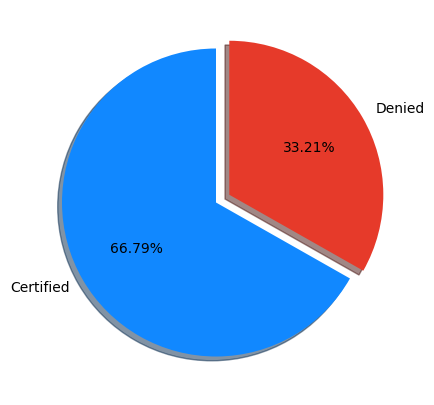

In [27]:
# Visualize the target feature case_status

percentage = df.case_status.value_counts(normalize=True)*100
labels = ['Certified', 'Denied']

#plot a piechart
fix, ax = plt.subplots(figsize = (5,5))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

Does case_status depend on continent?

In [28]:
# group data by continent and their count of case status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

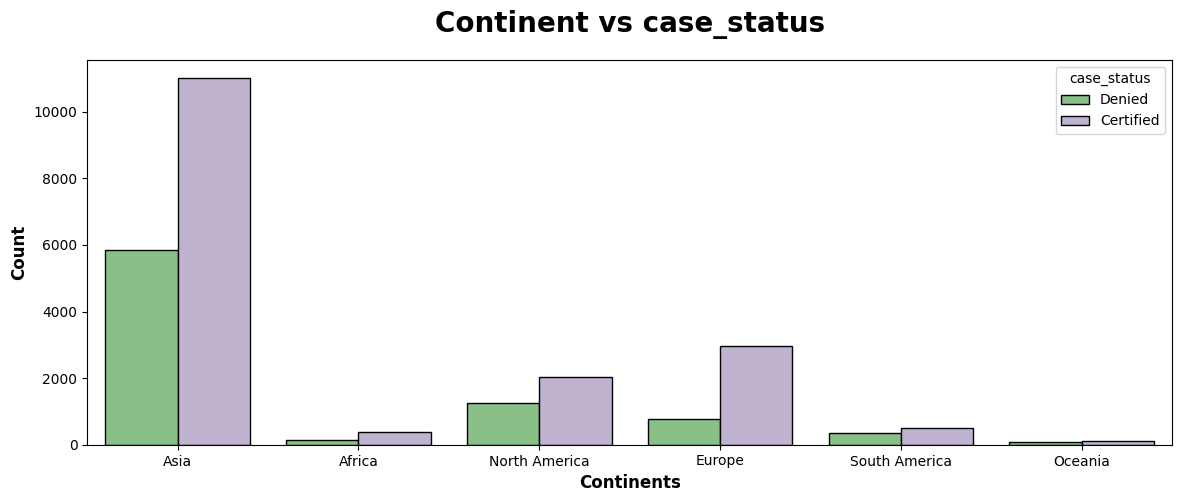

In [31]:
plt.subplots(figsize = (14,5))
sns.countplot(x="continent", hue="case_status", data=df, ec="black", palette="Accent")
plt.title("Continent vs case_status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=12)
plt.legend(title="case_status", fancybox=True)
plt.show()

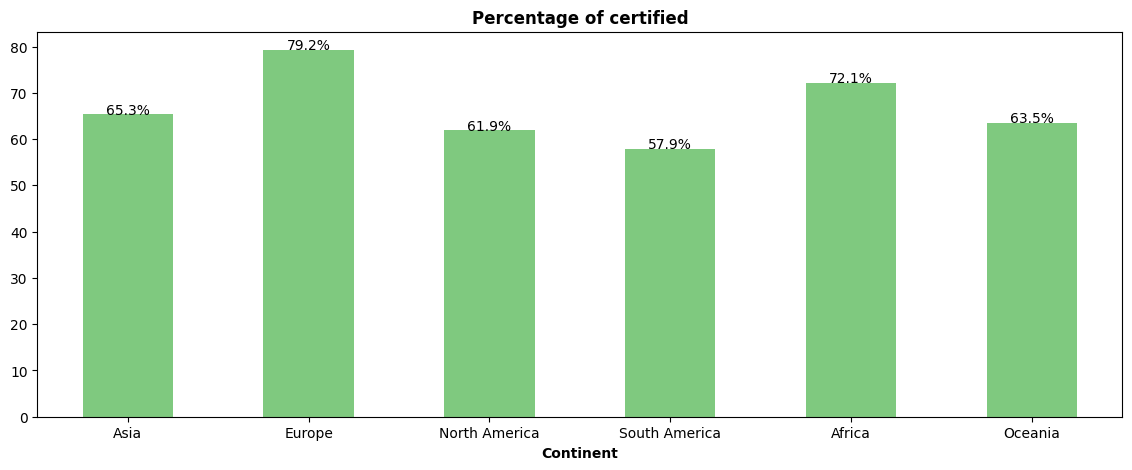

In [34]:
df2 = df.copy()
plt.figure(figsize=[14,5])

ratio = 100*df2[df2["case_status"].isin(["Certified"])]["continent"].value_counts()/df2["continent"].value_counts()

ratio.plot(
    kind="bar", stacked = True, colormap ="Accent")
plt.title("Percentage of certified", fontsize=12, fontweight="bold")
order1 = ratio

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha="center")

plt.xlabel("Continent", fontweight="bold")
plt.xticks(rotation=0)
plt.show()

Impact of education on case status

In [36]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

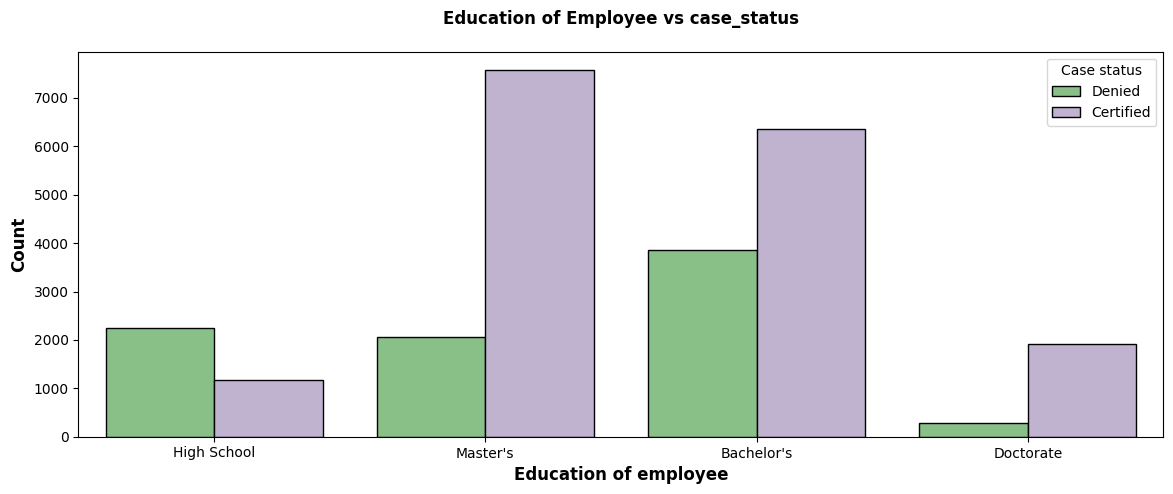

In [37]:
plt.subplots(figsize=(14, 5))
sns.countplot(x='education_of_employee', hue='case_status', data = df, ec='black', palette='Accent')
plt.title('Education of Employee vs case_status', weight='bold', fontsize=12, pad=20)
plt.ylabel('Count', weight='bold', fontsize=12)
plt.xlabel('Education of employee', weight='bold', fontsize=12)
plt.legend(title='Case status', fancybox=True)
plt.show()

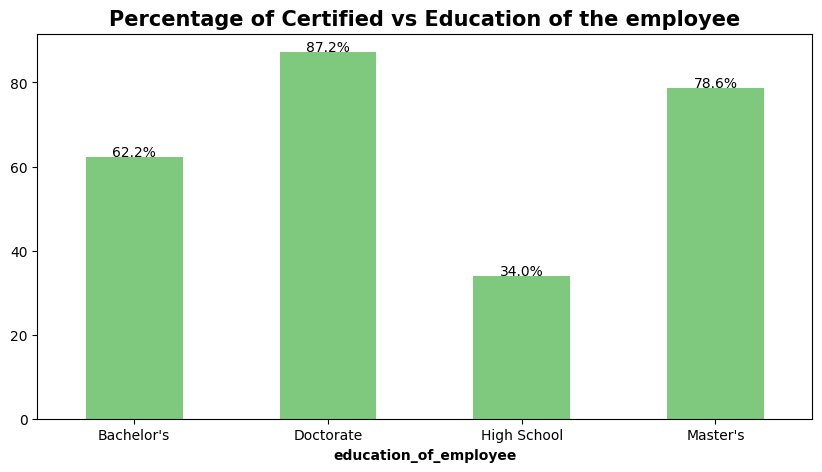

In [43]:
plt.figure(figsize=(10,5))

ratio = 100 * df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()

ratio.plot(kind='bar', stacked=True, colormap="Accent")
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold')
for n in range(ratio.shape[0]):
    count = ratio[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()
    

Impact of work experience on case status

In [44]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

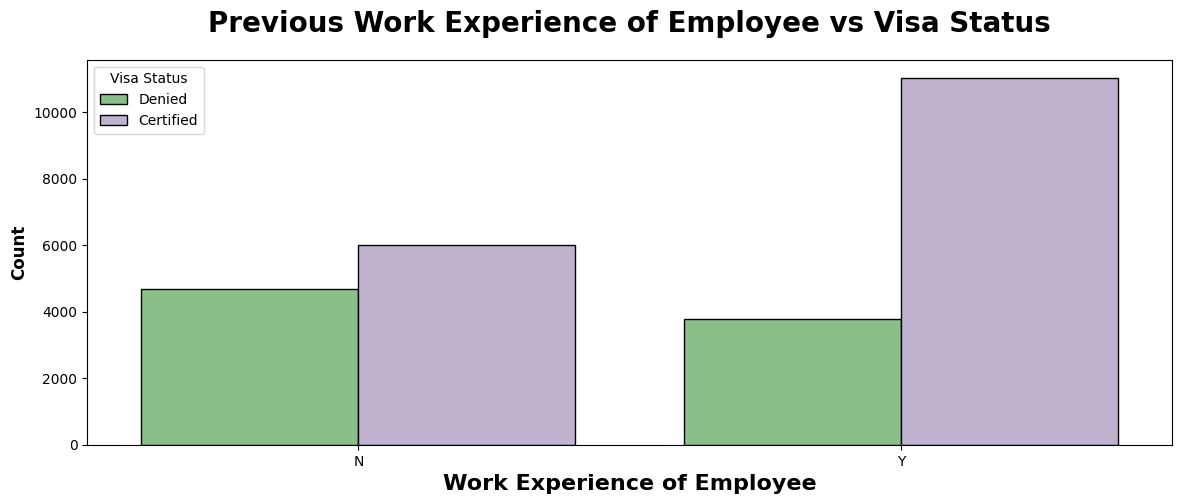

In [45]:
plt.subplots(figsize=(14,5))
sns.countplot(x='has_job_experience', hue='case_status', data=df, ec='black', palette='Accent')
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

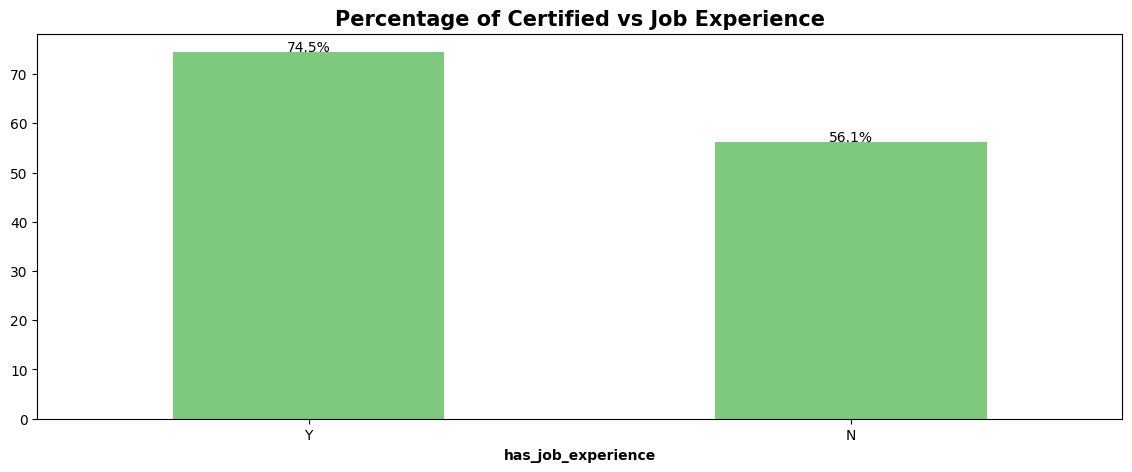

In [50]:
plt.figure(figsize=(14,5))
ratio = 100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()

ratio.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )

for n in range(ratio.shape[0]):
    count = ratio[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Impact of job training on case_status

In [51]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

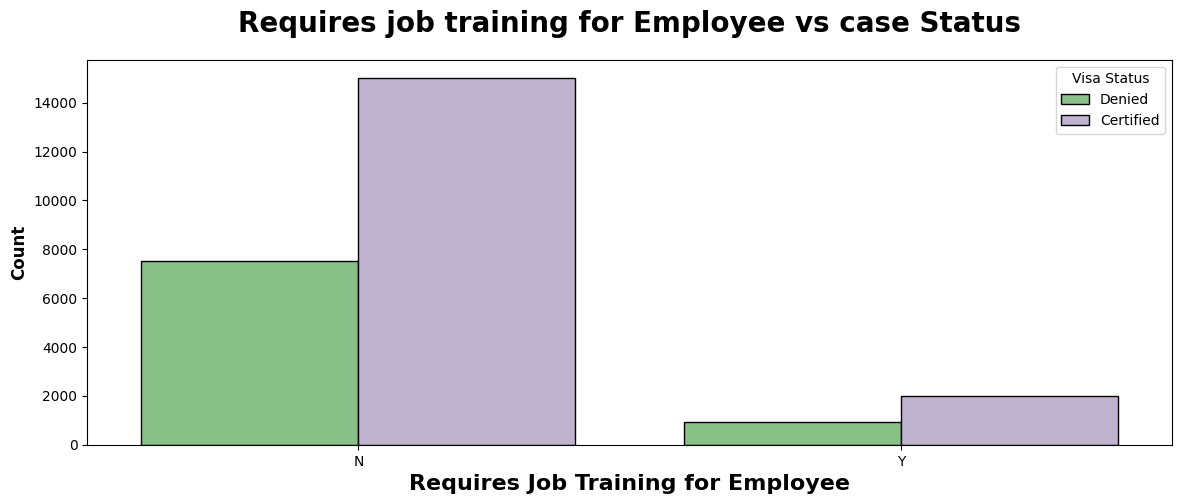

In [54]:
plt.subplots(figsize=(14,5))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs case Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

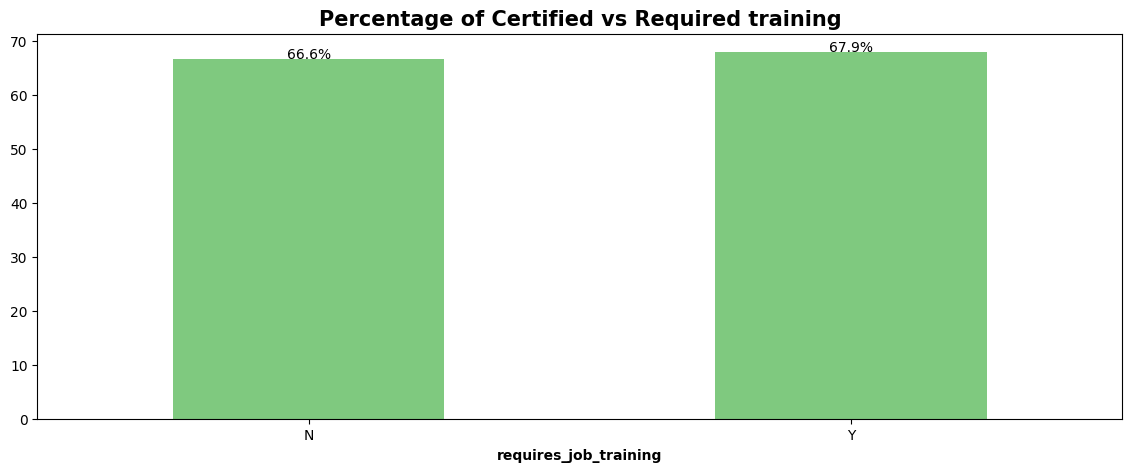

In [56]:
plt.figure(figsize=[14,5])

ratio = 100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()

ratio.plot(kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
for n in range(ratio.shape[0]):
    count = ratio[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Impact of number of employees on case_status

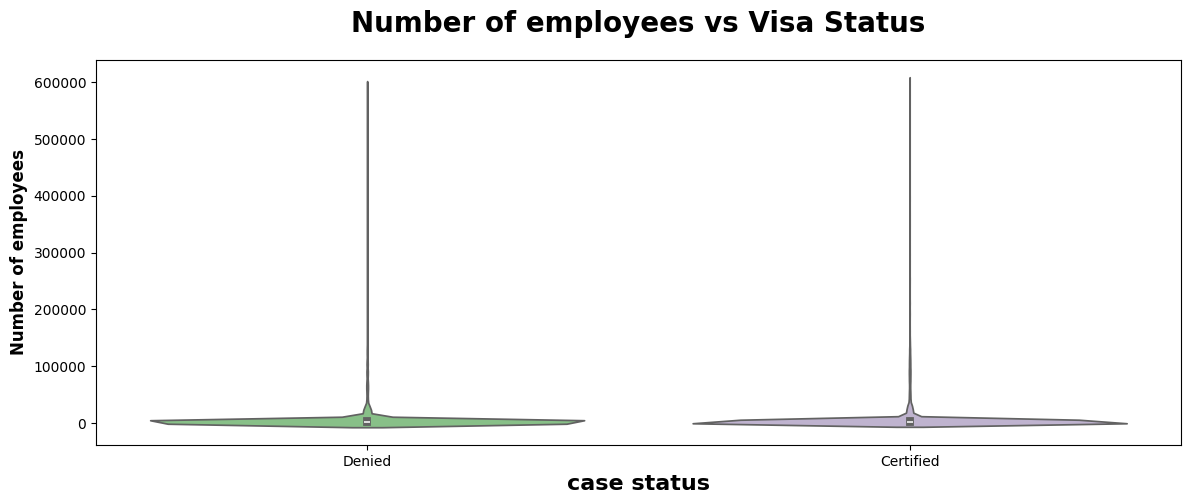

In [58]:
plt.subplots(figsize=(14,5))
sns.violinplot(x="case_status", y="no_of_employees", data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Number of employees", weight="bold", fontsize=12)
plt.xlabel("case status", weight="bold", fontsize=16)
plt.ylim()
plt.show()

Impact of wages on case status

In [59]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

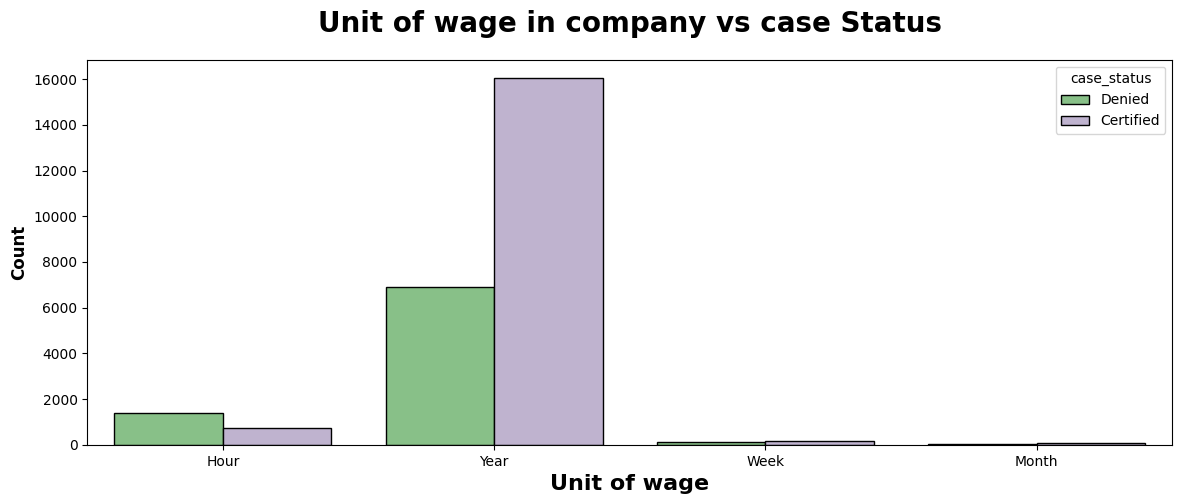

In [62]:
plt.subplots(figsize=(14,5))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("Unit of wage in company vs case Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Unit of wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()


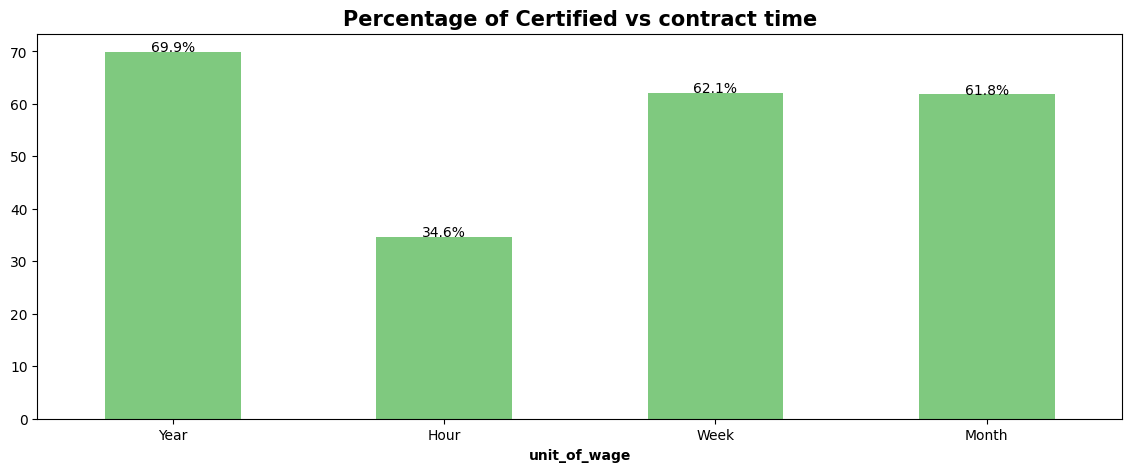

In [64]:
plt.figure(figsize=[14,5])

ratio = 100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()
ratio.plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )

for n in range(ratio.shape[0]):
    count = ratio[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Impact of Region of employment on case status

In [70]:
# group by
df.groupby("region_of_employment")["case_status"].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

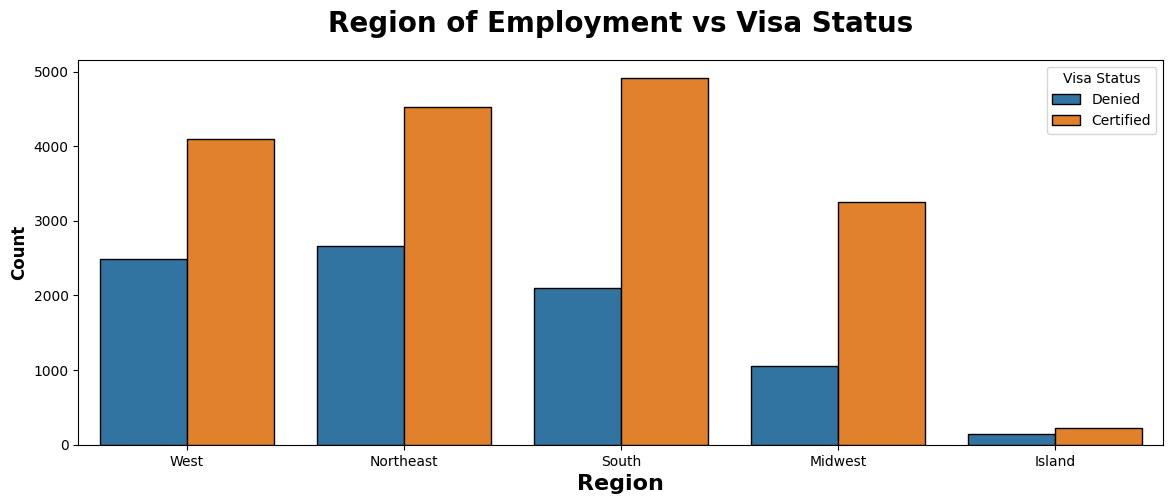

In [66]:
plt.subplots(figsize=(14,5))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

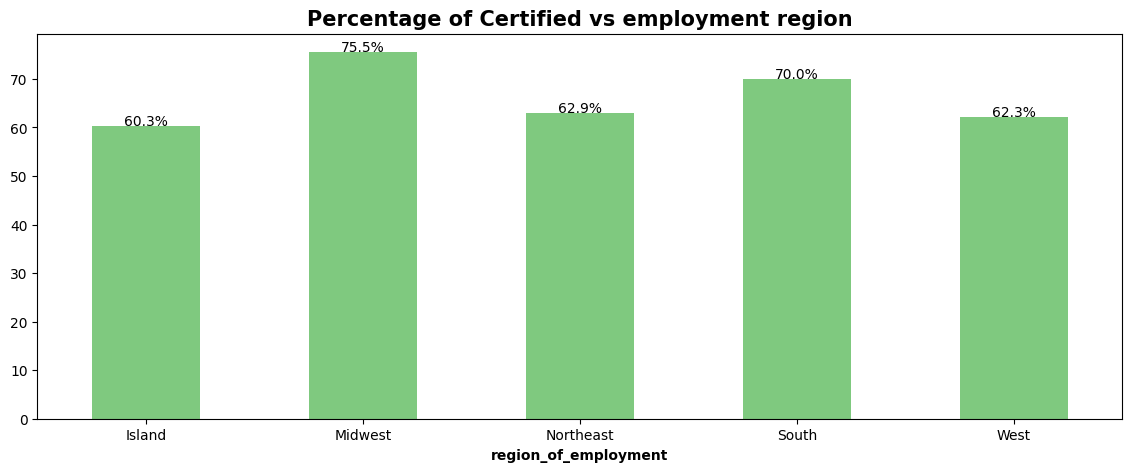

In [72]:
plt.figure(figsize=[14,5])

ratio = 100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()
ratio.plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )

for n in range(ratio.shape[0]):
    count = ratio[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Impact of prevailing wage on case status

In [73]:
df.groupby("prevailing_wage").case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

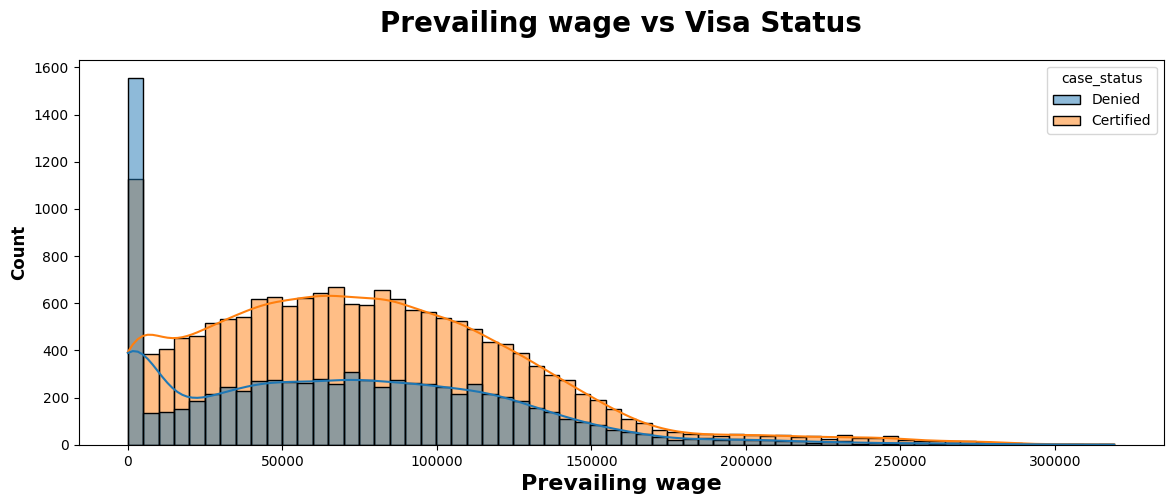

In [76]:
plt.subplots(figsize=(14,5))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()


Prevailing wage based on education

In [80]:
df.groupby("education_of_employee").prevailing_wage.mean().to_frame().sort_values(by="prevailing_wage", ascending=False)

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


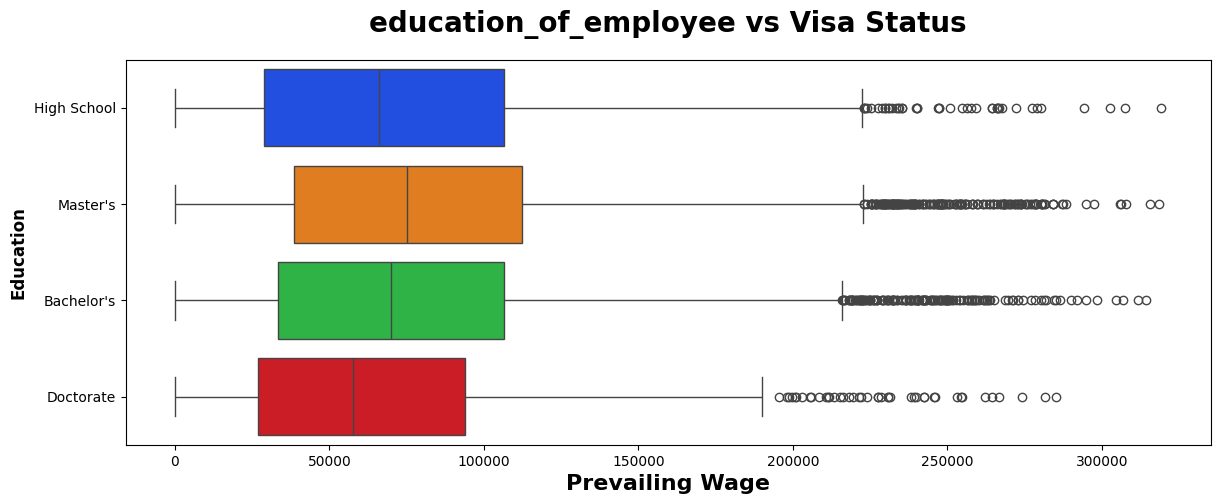

In [81]:
plt.subplots(figsize=(14,5))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

In [ ]:
prevailing wage and job experience

In [82]:
df.groupby("has_job_experience").prevailing_wage.median().to_frame().sort_values(by="has_job_experience", ascending = True)

,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


prevailing wage and continent

In [ ]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

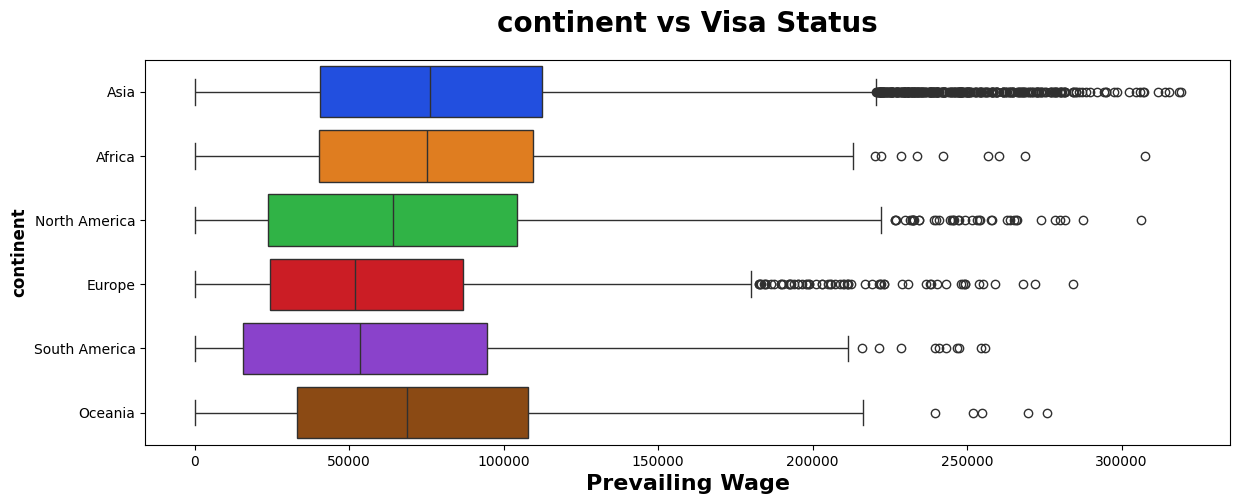

In [84]:
plt.subplots(figsize=(14,5))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

impact of year of establishment on case status

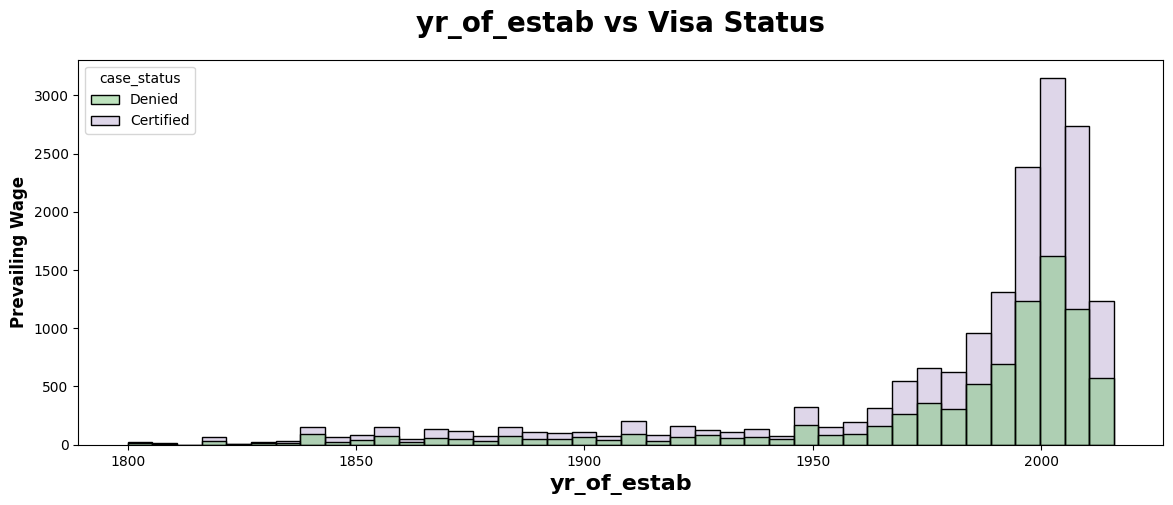

In [87]:
plt.subplots(figsize=(14,5))
sns.histplot(x="yr_of_estab", data=df, hue="case_status", bins=40, palette="Accent")
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()


Final Report
case_id column can be dropped as it is an ID.
requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
no_of_employees, prevailing_wage columns have outllier which should be handled.
continent columns has few unique values with very less count, which can be made as others
Target column case_status is imbalanced can be handled before model building.